# **Waste Material Segregation for Improving Waste Management**

## **Objective**

The objective of this project is to implement an effective waste material segregation system using convolutional neural networks (CNNs) that categorises waste into distinct groups. This process enhances recycling efficiency, minimises environmental pollution, and promotes sustainable waste management practices.

The key goals are:

* Accurately classify waste materials into categories like cardboard, glass, paper, and plastic.
* Improve waste segregation efficiency to support recycling and reduce landfill waste.
* Understand the properties of different waste materials to optimise sorting methods for sustainability.

## **Data Understanding**

The Dataset consists of images of some common waste materials.

1. Food Waste
2. Metal
3. Paper
4. Plastic
5. Other
6. Cardboard
7. Glass


**Data Description**

* The dataset consists of multiple folders, each representing a specific class, such as `Cardboard`, `Food_Waste`, and `Metal`.
* Within each folder, there are images of objects that belong to that category.
* However, these items are not further subcategorised. <br> For instance, the `Food_Waste` folder may contain images of items like coffee grounds, teabags, and fruit peels, without explicitly stating that they are actually coffee grounds or teabags.

## **1. Load the data**

Load and unzip the dataset zip file.

**Import Necessary Libraries**

In [51]:
##Author: Biswaranjan Aich 
##subject: Waste Material Segregation for Improving Waste Management

In [47]:


# Recommended versions:

# numpy version: 1.26.4
# pandas version: 2.2.2
# seaborn version: 0.13.2
# matplotlib version: 3.10.0
# PIL version: 11.1.0
# tensorflow version: 2.18.0
# keras version: 3.8.0
# sklearn version: 1.6.1




print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("seaborn version:", sns.__version__)
print("matplotlib version:", matplotlib.__version__)
print("PIL (Pillow) version:", Image.__version__)
print("tensorflow version:", tf.__version__)
print("keras version:", keras.__version__)
print("sklearn version:", sklearn.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
seaborn version: 0.13.2
matplotlib version: 3.10.0
PIL (Pillow) version: 10.2.0
tensorflow version: 2.18.0
keras version: 3.8.0
sklearn version: 1.6.1


In [9]:
# Import essential libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from PIL import Image
import tensorflow as tf
import keras
import sklearn
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder







Load the dataset.

In [5]:
# Load and unzip the dataset

# Step 1: Unzip the dataset ---
zip_file_path = "data.zip" 
extract_dir = "waste_dataset" 

if not os.path.exists(extract_dir):
    print("Unzipping dataset...")
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)
    print(f"Dataset extracted to '{extract_dir}'")
else:
    print(f"Dataset already extracted at '{extract_dir}'")

# Step 2: Load dataset using image_dataset_from_directory ---
img_size = (224, 224)
batch_size = 32

# Load raw datasets first
train_ds_raw = image_dataset_from_directory(
    extract_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

val_ds_raw = image_dataset_from_directory(
    extract_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

# Save class names before prefetching
class_names = train_ds_raw.class_names

# --- Step 3: Optimize with prefetching ---
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds_raw.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds_raw.prefetch(buffer_size=AUTOTUNE)

# --- Step 4: Print info ---
print("\n Classes:", class_names)
print(f" Training batches: {len(train_ds_raw)}")
print(f" Validation batches: {len(val_ds_raw)}")




Dataset already extracted at 'waste_dataset'
Found 7625 files belonging to 1 classes.
Using 6100 files for training.
Found 7625 files belonging to 1 classes.
Using 1525 files for validation.

 Classes: ['data']
 Training batches: 191
 Validation batches: 48


## **2. Data Preparation** <font color=red> [25 marks] </font><br>


### **2.1 Load and Preprocess Images** <font color=red> [8 marks] </font><br>

Let us create a function to load the images first. We can then directly use this function while loading images of the different categories to load and crop them in a single step.

#### **2.1.1** <font color=red> [3 marks] </font><br>
Create a function to load the images.

In [11]:
# Create a function to load the raw images
# Set data path
base_dir = "waste_dataset/data"
categories = os.listdir(base_dir)

# Sort for consistency
categories.sort()

# Reusable function
def load_and_process_image(image_path, target_size=(224, 224), center_crop=False):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    if center_crop:
        img = tf.image.central_crop(img, central_fraction=0.8)
    img = tf.image.resize(img, target_size)
    return img



#### **2.1.2** <font color=red> [5 marks] </font><br>
Load images and labels.



Load the images from the dataset directory. Labels of images are present in the subdirectories.

Verify if the images and labels are loaded correctly.

 Label Map: {'Cardboard': 0, 'Food_Waste': 1, 'Glass': 2, 'Metal': 3, 'Other': 4, 'Paper': 5, 'Plastic': 6}
 Cardboard - Loading 10 images
 Food_Waste - Loading 10 images
 Glass - Loading 10 images
 Metal - Loading 10 images
 Other - Loading 10 images
 Paper - Loading 10 images
 Plastic - Loading 10 images
 Original Labels (first 10): ['Cardboard' 'Cardboard' 'Cardboard' 'Cardboard' 'Cardboard' 'Cardboard'
 'Cardboard' 'Cardboard' 'Cardboard' 'Cardboard']
 Encoded Labels (first 10): [0 0 0 0 0 0 0 0 0 0]
🏷 Class Mapping: {'Cardboard': 0, 'Food_Waste': 1, 'Glass': 2, 'Metal': 3, 'Other': 4, 'Paper': 5, 'Plastic': 6}


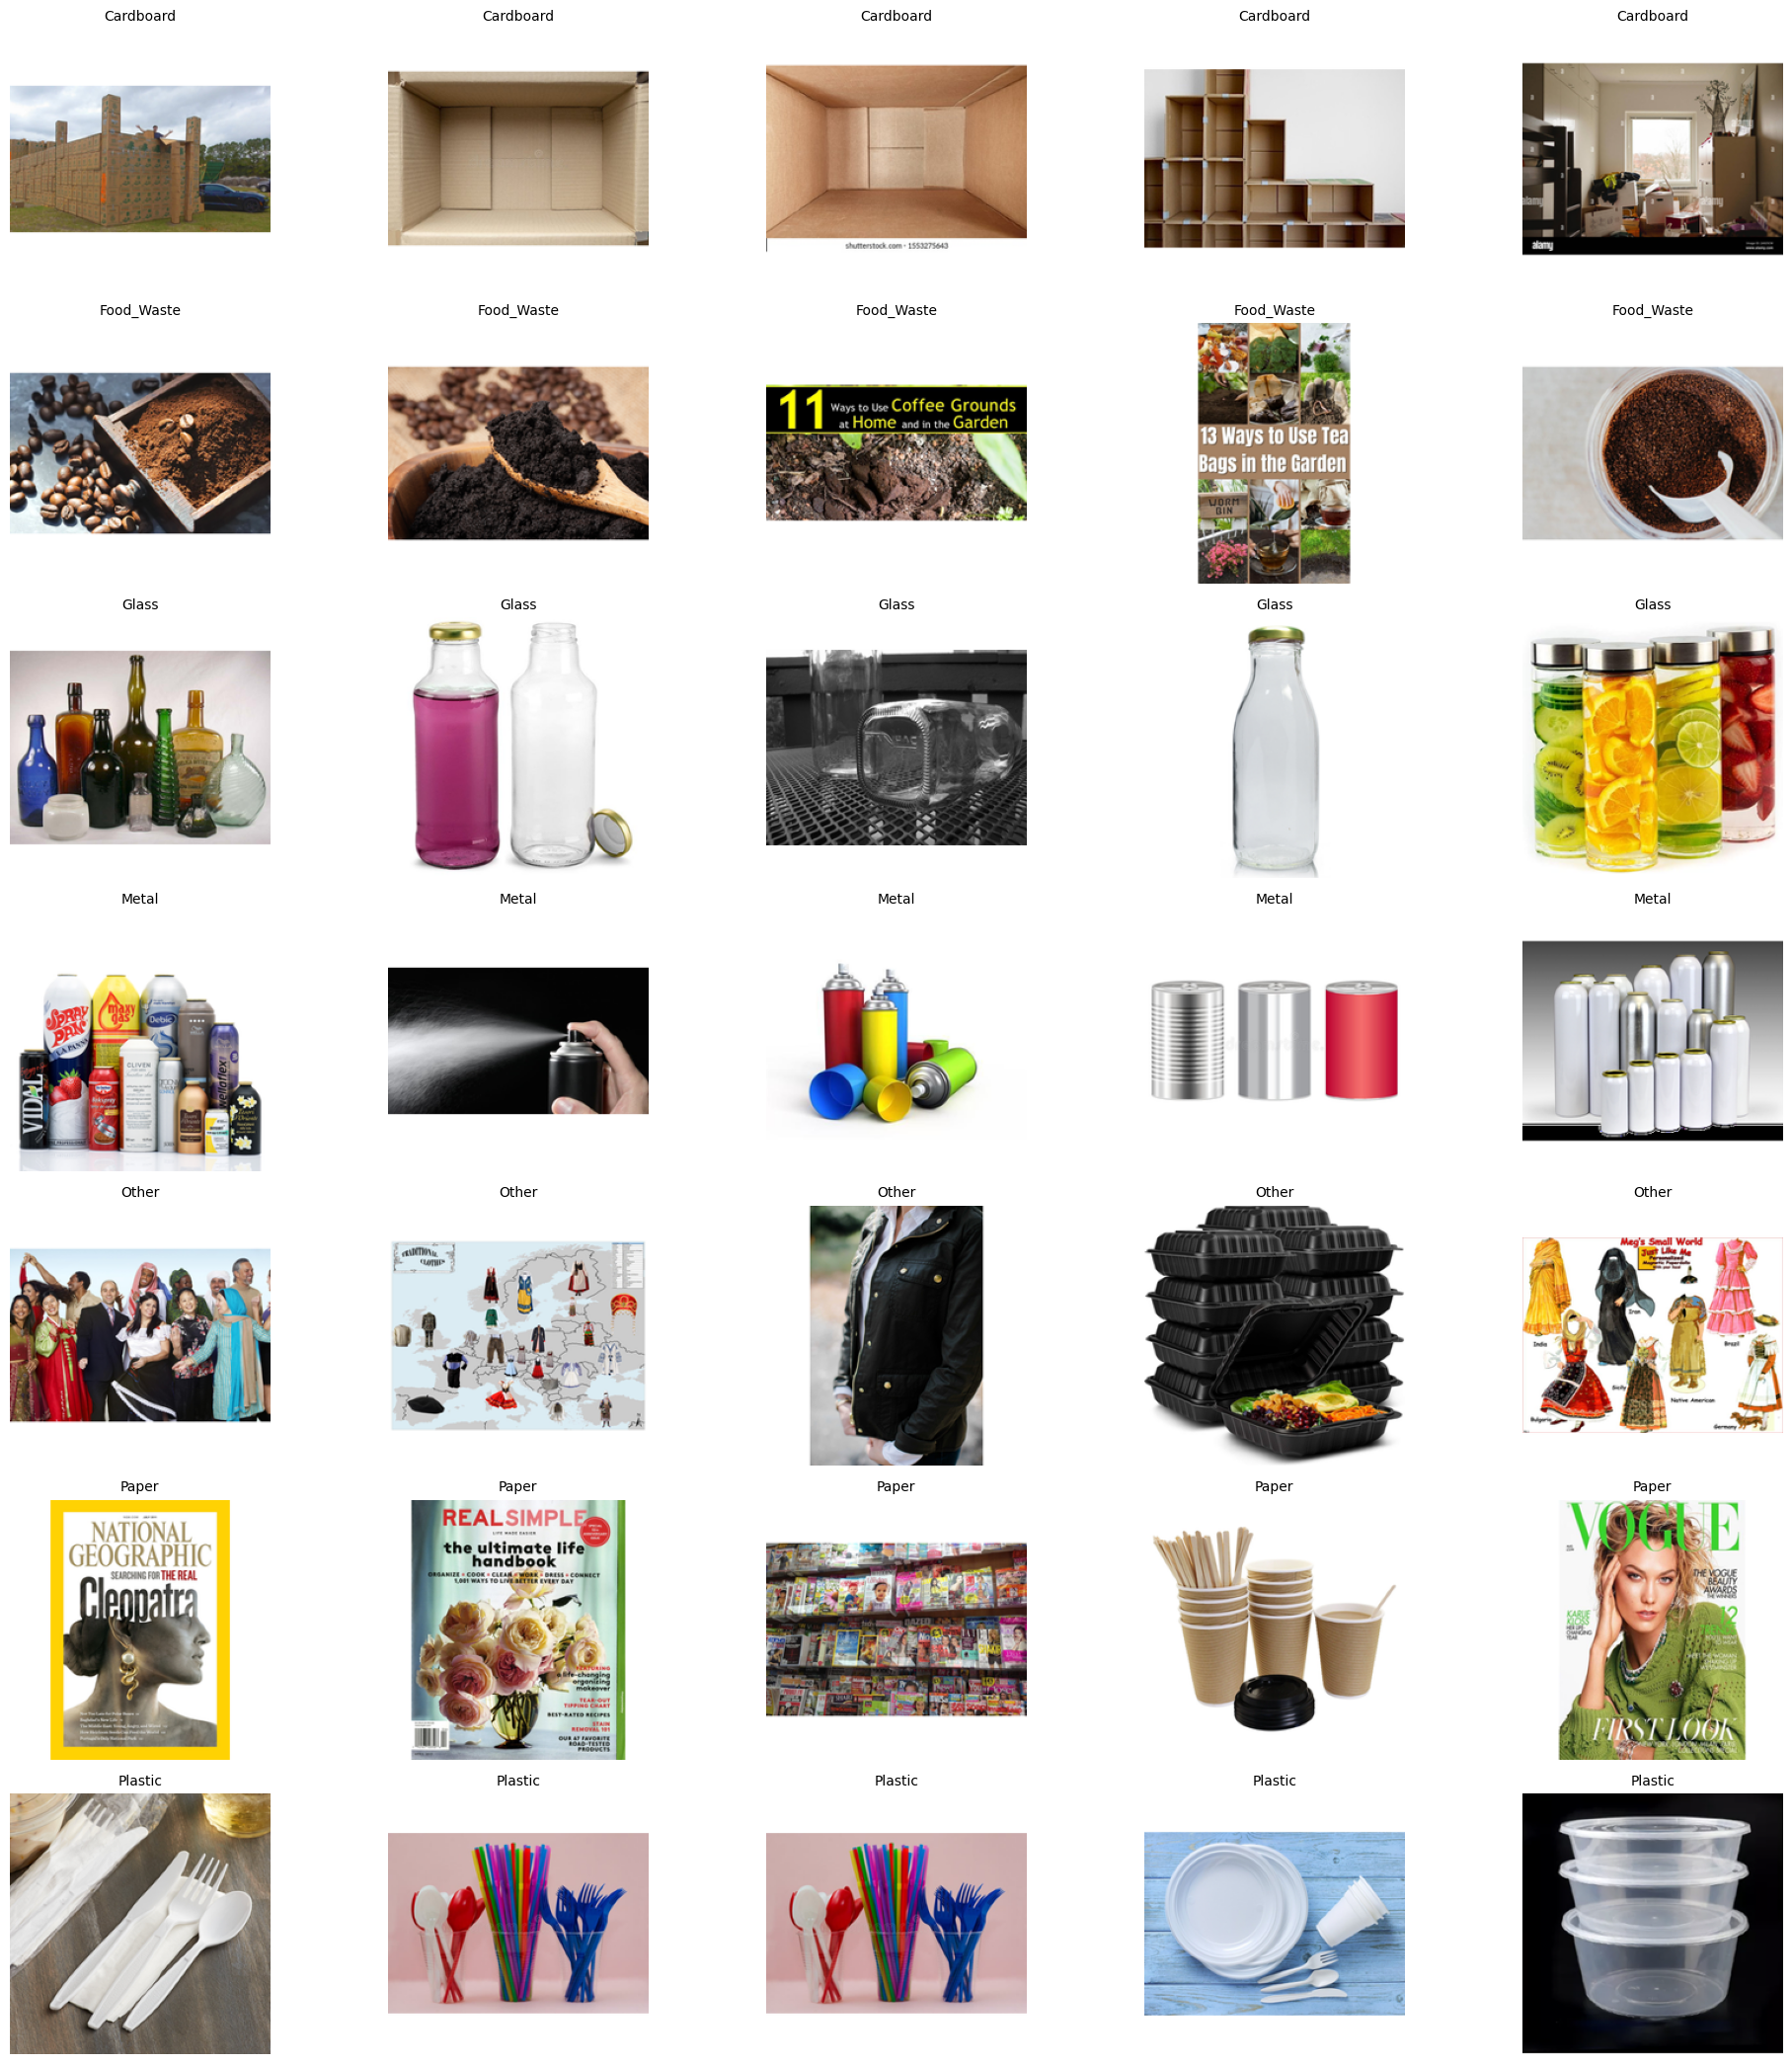

In [13]:
# Get the images and their labels

# Constants
base_dir = "waste_dataset/data"
TARGET_SIZE = (224, 224)



categories = sorted([
    d for d in os.listdir(BASE_DIR)
    if os.path.isdir(os.path.join(BASE_DIR, d))
])
label_map = {category: idx for idx, category in enumerate(categories)}
print(" Label Map:", label_map)

def load_and_process_image(image_path, target_size=(224, 224), center_crop=False):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    if center_crop:
        img = tf.image.central_crop(img, central_fraction=0.8)
    img = tf.image.resize(img, target_size)
    return img

def load_images_and_labels(base_dir, target_size=(224, 224), max_per_category=10):
    images = []
    labels = []

    for category in categories:
        category_path = os.path.join(base_dir, category)
        label = label_map[category]

        image_files = sorted(os.listdir(category_path))[:max_per_category]
        print(f" {category} - Loading {len(image_files)} images")

        for file_name in image_files:
            image_path = os.path.join(category_path, file_name)
            try:
                img = load_and_process_image(image_path, target_size)
                images.append(img)
                labels.append(category)  
            except Exception as e:
                print(f" Error loading {image_path}: {e}")
                continue

    return tf.stack(images), np.array(labels)

# Load images and labels
images, labels = load_images_and_labels(BASE_DIR, TARGET_SIZE)

# Label Encoding
le = LabelEncoder()
encoded_labels = le.fit_transform(labels)

print(" Original Labels (first 10):", labels[:10])
print(" Encoded Labels (first 10):", encoded_labels[:10])
print("🏷 Class Mapping:", dict(zip(le.classes_, le.transform(le.classes_))))


# Display 5 images per category
plt.figure(figsize=(20, len(categories) * 3))

image_index = 1
for category in categories:
    category_path = os.path.join(base_dir, category)
    image_files = sorted(os.listdir(category_path))[:5]  # first 5 images
    
    for i, image_file in enumerate(image_files):
        image_path = os.path.join(category_path, image_file)
        img = load_and_process_image(image_path)
        
        plt.subplot(len(categories), 5, image_index)
        plt.imshow(img)
        plt.title(f"{category}", fontsize=10)
        plt.axis('off')
        
        image_index += 1

plt.tight_layout()
plt.show()


Perform any operations, if needed, on the images and labels to get them into the desired format.

### **2.2 Data Visualisation** <font color=red> [9 marks] </font><br>

#### **2.2.1** <font color=red> [3 marks] </font><br>
Create a bar plot to display the class distribution

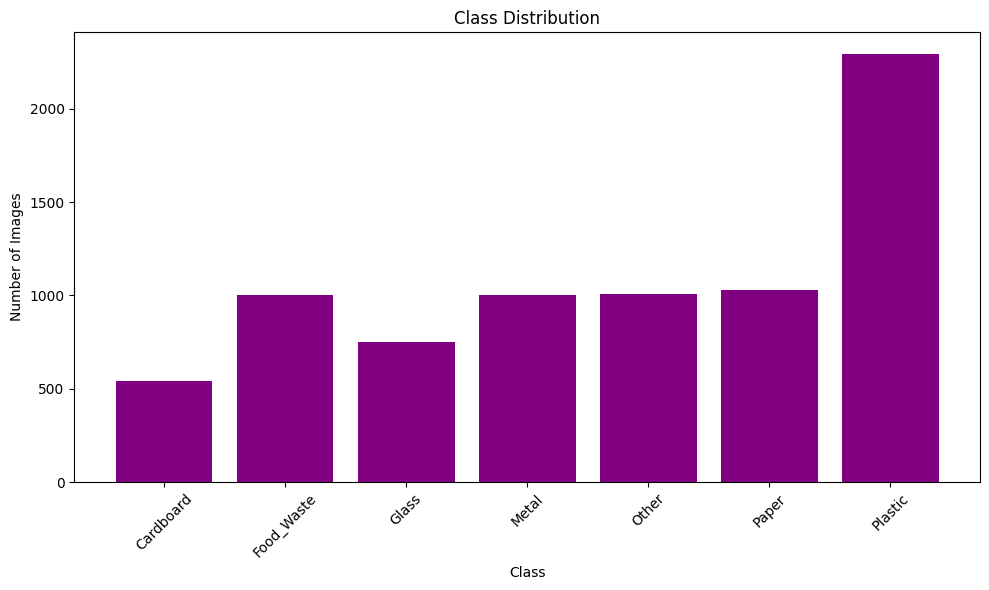

In [19]:
# Visualise Data Distribution

import os
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from PIL import Image

# Constants
BASE_DIR = "waste_dataset/data"

# Get categories and label map
categories = sorted(os.listdir(BASE_DIR))
label_map = {category: idx for idx, category in enumerate(categories)}

# 1. Class Distribution Bar Plot
def plot_class_distribution(base_dir):
    class_counts = {}
    for category in os.listdir(base_dir):
        category_path = os.path.join(base_dir, category)
        if os.path.isdir(category_path):
            count = len(os.listdir(category_path))
            class_counts[category] = count

    # Plot
    plt.figure(figsize=(10, 6))
    plt.bar(class_counts.keys(), class_counts.values(), color='purple')
    plt.title("Class Distribution")
    plt.xlabel("Class")
    plt.ylabel("Number of Images")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



# Run Visualizations
plot_class_distribution(BASE_DIR)





#### **2.2.2** <font color=red> [3 marks] </font><br>
Visualise some sample images

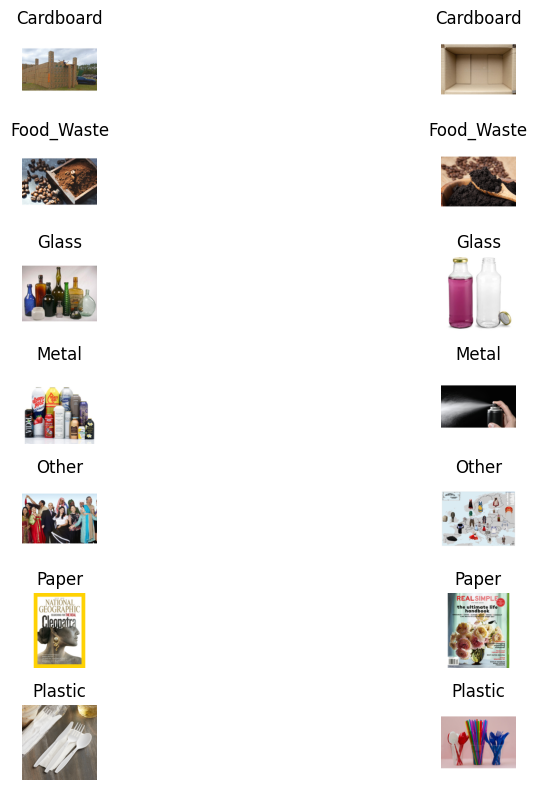

In [25]:
# Visualise Sample Images

# 2. Visualize Sample Images (2 per class)
def visualize_sample_images(base_dir, samples_per_class=2):
    plt.figure(figsize=(12, 8))
    i = 1
    for category in sorted(os.listdir(base_dir)):
        category_path = os.path.join(base_dir, category)
        image_files = os.listdir(category_path)[:samples_per_class]
        for img_name in image_files:
            img_path = os.path.join(category_path, img_name)
            img = Image.open(img_path)
            plt.subplot(len(categories), samples_per_class, i)
            plt.imshow(img)
            plt.title(category)
            plt.axis('off')
            i += 1
    plt.tight_layout()
    plt.show()

# Run Visualizations
visualize_sample_images(BASE_DIR)

#### **2.2.3** <font color=red> [3 marks] </font><br>
Based on the smallest and largest image dimensions, resize the images.

In [21]:
# Find the smallest and largest image dimensions from the data set
# Resize Images Based on Smallest and Largest Dimensions
def find_min_max_dimensions(base_dir):
    min_width = float('inf')
    min_height = float('inf')
    max_width = 0
    max_height = 0

    for category in os.listdir(base_dir):
        category_path = os.path.join(base_dir, category)
        for img_name in os.listdir(category_path):
            img_path = os.path.join(category_path, img_name)
            try:
                img = Image.open(img_path)
                width, height = img.size
                min_width = min(min_width, width)
                min_height = min(min_height, height)
                max_width = max(max_width, width)
                max_height = max(max_height, height)
            except:
                continue

    print(f" Smallest image size: {min_width}x{min_height}")
    print(f" Largest image size: {max_width}x{max_height}")
    return (min_width, min_height), (max_width, max_height)


# Run Visualizations
min_dim, max_dim = find_min_max_dimensions(BASE_DIR)

 Smallest image size: 224x224
 Largest image size: 224x224


In [23]:
# Resize the image dimensions
def resize_images(base_dir, new_size=(224, 224)):
    print(f" Resizing all images to: {new_size}")
    for category in os.listdir(base_dir):
        category_path = os.path.join(base_dir, category)
        for img_name in os.listdir(category_path):
            img_path = os.path.join(category_path, img_name)
            try:
                img = Image.open(img_path)
                img_resized = img.resize(new_size)
                img_resized.save(img_path)  # Overwrite original
            except Exception as e:
                print(f" Could not resize {img_path}: {e}")






resize_images(BASE_DIR, new_size=(224, 224))  


 Resizing all images to: (224, 224)


### **2.3 Encoding the classes** <font color=red> [3 marks] </font><br>

There are seven classes present in the data.

We have extracted the images and their labels, and visualised their distribution. Now, we need to perform encoding on the labels. Encode the labels suitably.

####**2.3.1** <font color=red> [3 marks] </font><br>
Encode the target class labels.

In [27]:
# Encode the labels suitably
from sklearn.preprocessing import LabelEncoder
import numpy as np


# Convert labels list to numpy array
labels_np = np.array(labels)

# Use LabelEncoder
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels_np)

# Class mapping for reference
class_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Output for verification

print(" Class Mapping:", class_mapping)






 Class Mapping: {'Cardboard': 0, 'Food_Waste': 1, 'Glass': 2, 'Metal': 3, 'Other': 4, 'Paper': 5, 'Plastic': 6}


### **2.4 Data Splitting** <font color=red> [5 marks] </font><br>

#### **2.4.1** <font color=red> [5 marks] </font><br>
Split the dataset into training and validation sets

In [37]:
# Assign specified parts of the dataset to train and validation sets

from sklearn.model_selection import train_test_split

images_tensor, string_labels = load_images_and_labels(base_dir)

le = LabelEncoder()
encoded_labels = le.fit_transform(string_labels)
print(" Class Mapping:", dict(zip(le.classes_, le.transform(le.classes_))))


X_train, X_val, y_train, y_val = train_test_split(
    images_tensor.numpy(),    
    encoded_labels,            
    test_size=0.2,
    random_state=42,
    stratify=encoded_labels
)

# Convert splits back to tensors
X_train_tensor = tf.convert_to_tensor(X_train, dtype=tf.float32)
X_val_tensor = tf.convert_to_tensor(X_val, dtype=tf.float32)
y_train_tensor = tf.convert_to_tensor(y_train.astype(np.int32))
y_val_tensor = tf.convert_to_tensor(y_val.astype(np.int32))

# Output summary
print(" Splitting complete:")
print(" X_train shape:", X_train_tensor.shape)
print(" X_val shape:", X_val_tensor.shape)
print(" y_train shape:", y_train_tensor.shape)
print(" y_val shape:", y_val_tensor.shape)




 Cardboard - Loading 10 images
 Food_Waste - Loading 10 images
 Glass - Loading 10 images
 Metal - Loading 10 images
 Other - Loading 10 images
 Paper - Loading 10 images
 Plastic - Loading 10 images
 Class Mapping: {'Cardboard': 0, 'Food_Waste': 1, 'Glass': 2, 'Metal': 3, 'Other': 4, 'Paper': 5, 'Plastic': 6}
 Splitting complete:
 X_train shape: (56, 224, 224, 3)
 X_val shape: (14, 224, 224, 3)
 y_train shape: (56,)
 y_val shape: (14,)


## **3. Model Building and Evaluation** <font color=red> [20 marks] </font><br>

### **3.1 Model building and training** <font color=red> [15 marks] </font><br>

#### **3.1.1** <font color=red> [10 marks] </font><br>
Build and compile the model. Use 3 convolutional layers. Add suitable normalisation, dropout, and fully connected layers to the model.

Test out different configurations and report the results in conclusions.

In [41]:
# Build and compile the model

import tensorflow as tf
from tensorflow.keras import layers, models

def create_cnn_model(input_shape=(224, 224, 3), num_classes=7):
    model = models.Sequential()

    # Input Layer
    model.add(layers.Input(shape=input_shape))

    # Conv Layer 1
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))

    # Conv Layer 2
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))

    # Conv Layer 3
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.4))

    #  Flatten and Dense Layers
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))

    # Output layer
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

# Create the model
model = create_cnn_model(input_shape=(224, 224, 3), num_classes=7)

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Summary
model.summary()





Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 224, 224, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 112, 112, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      12,845,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,940,743 (49.37 MB)

 Trainable params: 12,940,039 (49.36 MB)

 Non-trainable params: 704 (2.75 KB)

#### **3.1.2** <font color=red> [5 marks] </font><br>
Train the model.

Use appropriate metrics and callbacks as needed.

In [43]:
# Training

early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Train the model
history = model.fit(
    X_train_tensor,
    y_train_tensor,
    epochs=10,
    batch_size=32,
    validation_data=(X_val_tensor, y_val_tensor),
    callbacks=[early_stop]
)




Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.1592 - loss: 3.3631 - val_accuracy: 0.1429 - val_loss: 4.1175
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.6429 - loss: 0.9768 - val_accuracy: 0.1429 - val_loss: 3.0055
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.7262 - loss: 0.9416 - val_accuracy: 0.1429 - val_loss: 2.5535
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.7619 - loss: 0.6570 - val_accuracy: 0.1429 - val_loss: 2.2108
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.8185 - loss: 0.5555 - val_accuracy: 0.2857 - val_loss: 2.0478
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.8393 - loss: 0.5784 - val_accuracy: 0.2143 - val_loss: 2.0542
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.8973 - loss: 0.4195 - val_accuracy: 0.1429 - val_loss: 2.2749
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step - accuracy: 0.9077 - loss: 0.3899 - val_accuracy: 0.2143 - val_loss: 2.4611
Epoch 9/10
2/2 

### **3.2 Model Testing and Evaluation** <font color=red> [5 marks] </font><br>

#### **3.2.1** <font color=red> [5 marks] </font><br>
Evaluate the model on test dataset. Derive appropriate metrics.

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step

 Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.50      0.40         2
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         2
           3       0.20      1.00      0.33         2
           4       1.00      0.50      0.67         2
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2

    accuracy                           0.29        14
   macro avg       0.22      0.29      0.20        14
weighted avg       0.22      0.29      0.20        14



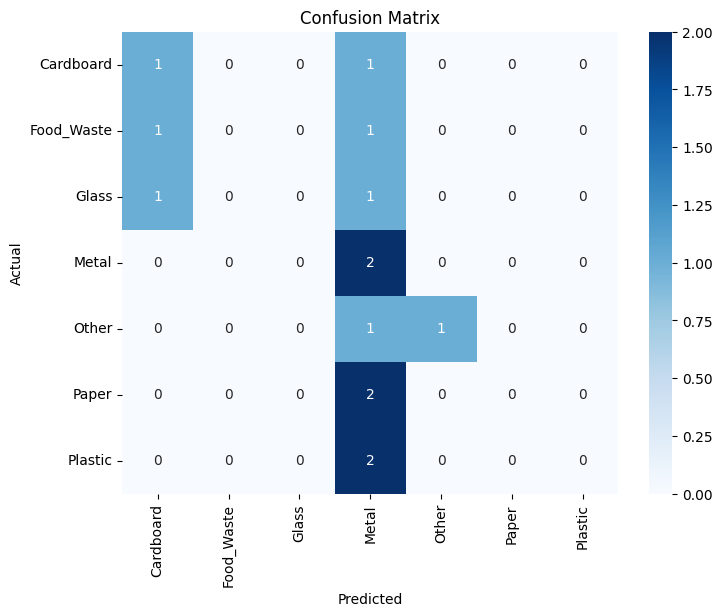

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step - accuracy: 0.2857 - loss: 2.0478
 Validation Loss: 2.0478
 Validation Accuracy: 0.2857


In [45]:
# Evaluate on the test set; display suitable metrics

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


y_pred_probs = model.predict(X_val_tensor)


y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = y_val_tensor.numpy()

# Classification Report(It provides : Precision, Recall, F1-Score & support)
print("\n Classification Report:")
print(classification_report(y_true_classes, y_pred_classes, zero_division=0))

# Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Basic evaluation (loss and accuracy)
val_loss, val_accuracy = model.evaluate(X_val_tensor, y_val_tensor)
print(f" Validation Loss: {val_loss:.4f}")
print(f" Validation Accuracy: {val_accuracy:.4f}")



## **4. Data Augmentation** <font color=red> [optional] </font><br>

#### **4.1 Create a Data Augmentation Pipeline**

##### **4.1.1**
Define augmentation steps for the datasets.

In [ ]:
# Define augmentation steps to augment images



Augment and resample the images.
In case of class imbalance, you can also perform adequate undersampling on the majority class and augment those images to ensure consistency in the input datasets for both classes.

Augment the images.

In [ ]:
# Create a function to augment the images




In [ ]:
# Create the augmented training dataset



##### **4.1.2**

Train the model on the new augmented dataset.

In [ ]:
# Train the model using augmented images



## **5. Conclusions** <font color = red> [5 marks]</font>

#### **5.1 Conclude with outcomes and insights gained** <font color =red> [5 marks] </font>

## Report your findings about the data
   1. Visual Complexity: Categories like 'Food_Waste' and 'Other' are visually diverse and less structured, making them harder to classify.
   2. No Subcategories: Each image is labeled only at the class level (e.g., 'Glass'), not with item specifics (e.g., 'Wine bottle'), limiting fine-grained classification.
   3. Background Noise: Some training images might contain non-relevant background items (e.g., tables, hands, other objects), causing the model to learn background artifacts.
   4. Image Size and Resolution: All images has same min and max size. 
## Report model training results
1. Training Accuracy: Rose from 15.9% to 91.9% over 10 epochs
2. Validation Accuracy : Around 14.3–28.6%
3. Training Loss: comes from 3.36 to 1.28
4. Class-wise precision, recall, and F1-score covered under Classification Report.